<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#輪郭抽出" data-toc-modified-id="輪郭抽出-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>輪郭抽出</a></span><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>import</a></span></li><li><span><a href="#画像を読み込む" data-toc-modified-id="画像を読み込む-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>画像を読み込む</a></span></li><li><span><a href="#二値化" data-toc-modified-id="二値化-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>二値化</a></span></li><li><span><a href="#輪郭抽出" data-toc-modified-id="輪郭抽出-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>輪郭抽出</a></span></li><li><span><a href="#輪郭図示" data-toc-modified-id="輪郭図示-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>輪郭図示</a></span></li></ul></li></ul></div>

# 輪郭抽出
## import

In [1]:
import cv2
import matplotlib.pyplot as plt

## 画像を読み込む

In [2]:
cap.release()#カメラ解放
cv2.destroyAllWindows() # window破棄

NameError: name 'cap' is not defined

In [28]:
i = 0

In [38]:
cap = cv2.VideoCapture(1) #PCカメラから入力. 0がデフォルト。自分は0で前面,1で背面カメラが作動
cap.set(3, 1280)
cap.set(4, 720)
while True:
    _, img = cap.read()#カメラの画像を読み込む
    cv2.imshow("pc camera", img) #ウィンドウに画像を出力
    #Enterが押されたらループを抜ける
    k = cv2.waitKey(10)#1ms確認
    if k == 13:
        break
cap.release()#カメラ解放
cv2.destroyAllWindows() # window破棄
raw_img = img.copy()

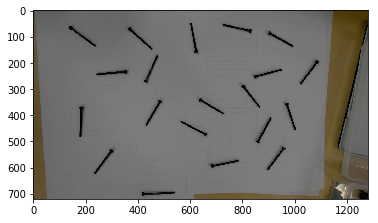

In [39]:
#画像を読み込む
# img = cv2.imread("test.jpg")
raw_img = img.copy()
plt.imshow(cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB))
# cap = cv2.VideoCapture(1) #PCカメラから入力. 0がデフォルト。自分は0で前面,1で背面カメラが作動
# while True:
# _, img = cap.read()#カメラの画像を読み込む
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# cap.release()#カメラ解放

## 二値化

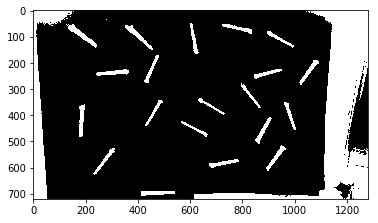

In [40]:
img = raw_img.copy()
#cv2.thresholdを使うためグレースケールに
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#画像を平滑化(白色雑音の除去). ksize:フィルタ窓枠の大きさ, sigmaX: ガウシアンの標準偏差値. 0だとカーネルのサイズから自動的に計算
graygauss = cv2.GaussianBlur(gray , ksize = (3,3),sigmaX =  0)
# 二値化. thresh:閾値.  maxval:閾値以上(指定により閾値以下のこともある)の値を持つ画素に対して割り当てられる値,
# type:二値化の方法。cv2.THRESH_BINARY_INVだと白黒かつ反転
# 返り値:[1]に画像が入っている
im2 = cv2.threshold(graygauss, thresh = 100, maxval = 240, type = cv2.THRESH_BINARY_INV)[1]
plt.imshow(im2, cmap="gray")

## 輪郭抽出

In [41]:
cnts = cv2.findContours(im2, mode = cv2.RETR_EXTERNAL, 
                        method = cv2.CHAIN_APPROX_SIMPLE)[1]

## 輪郭図示

x,y,w,h: 408 688 136 23
x,y,w,h: 672 567 117 36
x,y,w,h: 231 524 82 103
x,y,w,h: 891 516 75 96
x,y,w,h: 563 422 105 60
x,y,w,h: 848 407 65 102
x,y,w,h: 175 360 24 125
x,y,w,h: 959 348 47 110
x,y,w,h: 428 340 68 102
x,y,w,h: 631 335 101 64
x,y,w,h: 795 280 75 94
x,y,w,h: 240 225 126 25
x,y,w,h: 842 223 111 41
x,y,w,h: 1017 188 77 97
x,y,w,h: 422 170 59 110
x,y,w,h: 893 79 104 64
x,y,w,h: 352 58 107 96
x,y,w,h: 128 53 116 90
x,y,w,h: 721 52 116 39
x,y,w,h: 599 48 34 120
x,y,w,h: 617 0 663 720
x,y,w,h: 0 0 156 720


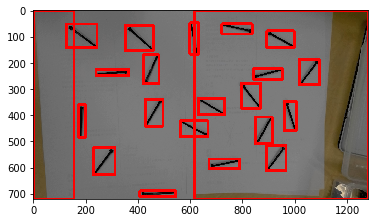

In [42]:
red = (0,0,255)
size_list = []
for pt in cnts:
    #輪郭を含む長方形を作る
    x,y,w,h = cv2.boundingRect(pt)
    # 小さい領域はスルー
    if w < 20 or h < 20:
        continue
    print("x,y,w,h:",x,y,w,h )
    size_list.append((x,x + w,y, y+h))
    #長方形を図示
    cv2.rectangle(img,(x,y), (x+w,y+h), red, thickness =10)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [43]:
def show_count():
    for lis in size_list:
        temp =  raw_img[lis[2]:lis[3], lis[0]:lis[1]]
#         print(temp)
        yield temp

In [44]:
for _, gen in enumerate(show_count()):
    cv2.imwrite("./neji_40/"+str(i) + "output.png", gen)
    i+=1
# plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB))

In [33]:
gen  = show_count()

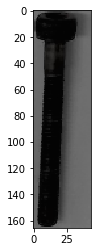

In [34]:
temp_img = []
while len(temp_img)==0:
    temp_img = gen.__next__()
plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB))